# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [2]:
# Fucntion that returns SFR given the lumionsity of the galaxy

def StarFormationRate(L,Type,TIR=0):
    """Computes SFR of a galaxy folloowing Kennicutt & Evans 2012 Eq12
    Inputs:
        L = luminosity of the galaxy in erg/s
        Type = string that lists the wavelength : FUV, NUV, TIR, Halpha
        TIR  = Total Infrared Luminosity (default = 0)
        
    Returns: 
        Log of the SFR in (Msun/year)"""
    
    if (Type == 'FUV'):
        logCx = 43.35 # Calibration from L to SFR from Talbe 1 (K&E 2012)
        TIRc = 0.46
        
    elif (Type == 'NUV'):
        logCx = 43.17
        TIRc = 0.27
    elif (Type == 'Halpha'):
        logCx = 41.27
        TIRc = 0.0024
    elif (Type == 'TIR'):
        logCx = 43.41
        TIRc = 0
    else:
        print("Missing Wavelength: FUV, NUV, Halpha, TIR")
        
    Lnew = L + TIRc*TIR
    
    return np.log10(Lnew) - logCx

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [3]:
LsunErgS = const.L_sun.to(u.erg/u.s).value

In [4]:
#  WLM Dwarf Irregular Galaxy
# Lee et al. 2009 WLM galaxy log(SFR) derived from UV is -2.21 from Galex
# From NED: WLM NUV luminosity (GALEX) 1.71e7 Lsun
# From NED: WLM NIR Luminosity (IRAC) 2.48e6 Lsun

NUV_WLM = 1.71e7*LsunErgS
TIR_WLM = 2.48e6*LsunErgS

StarFormationRate(NUV_WLM, 'NUV', TIR_WLM)

-2.3373504191027266

In [5]:
#  N24 Sc galaxy
# lee et al. 2009 NGC 24 log(SFR) derived from UV as -0.7
# From NED: NGC 24 NUV lunminosity (GALEX) 2.96e8 Lsun
# From NED: NGC 24 FIR luminosity (MIPS) 3.09e8 Lsun
# From NED: NGC 24 NIR luminoisty (2MASS) 8.24e8 Lsun

NUV_N24 = 2.96e8*LsunErgS
TIR_N24 = 3.09e8*LsunErgS + 8.34e8*LsunErgS

StarFormationRate(NUV_N24, 'NUV', TIR_N24)


-0.8055527449424105

# Part B Star formation main sequence

Write a function that returns the average SFR of a galaxy at a given redshift. 

What is the average SFR of a MW mass galaxy today? at z=1?

Plot the SFR main sequence for a few different redshifts.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

In [6]:
# Create a function that returns the SFR main sequence

def SFRMainSequence(Mstar, z):
    """Average SFR as a function of stellar mass and redshift
    
    Inputs:
        z = redshift
        Mstar = Stellar mass of the galaxy in Msun
        
    Retuns:
        log(SFR (Msun/year))"""
    
    alpha = 0.7 - 0.13*z
    beta = 0.38 +1.14*z - 0.19*z**2
    
    return alpha * (np.log10(Mstar)-10.5) + beta

In [7]:
# MW at z=0

10**SFRMainSequence(6e10, 0)

# actual SFR of MW is only 1 Msun/yr

3.7558295562247412

In [9]:
# MW at z = 1
10**SFRMainSequence(6e10, 1)



30.799680595160783

In [10]:
# create an array of stellar masses

Mass = np.linspace(1e9, 1e12)

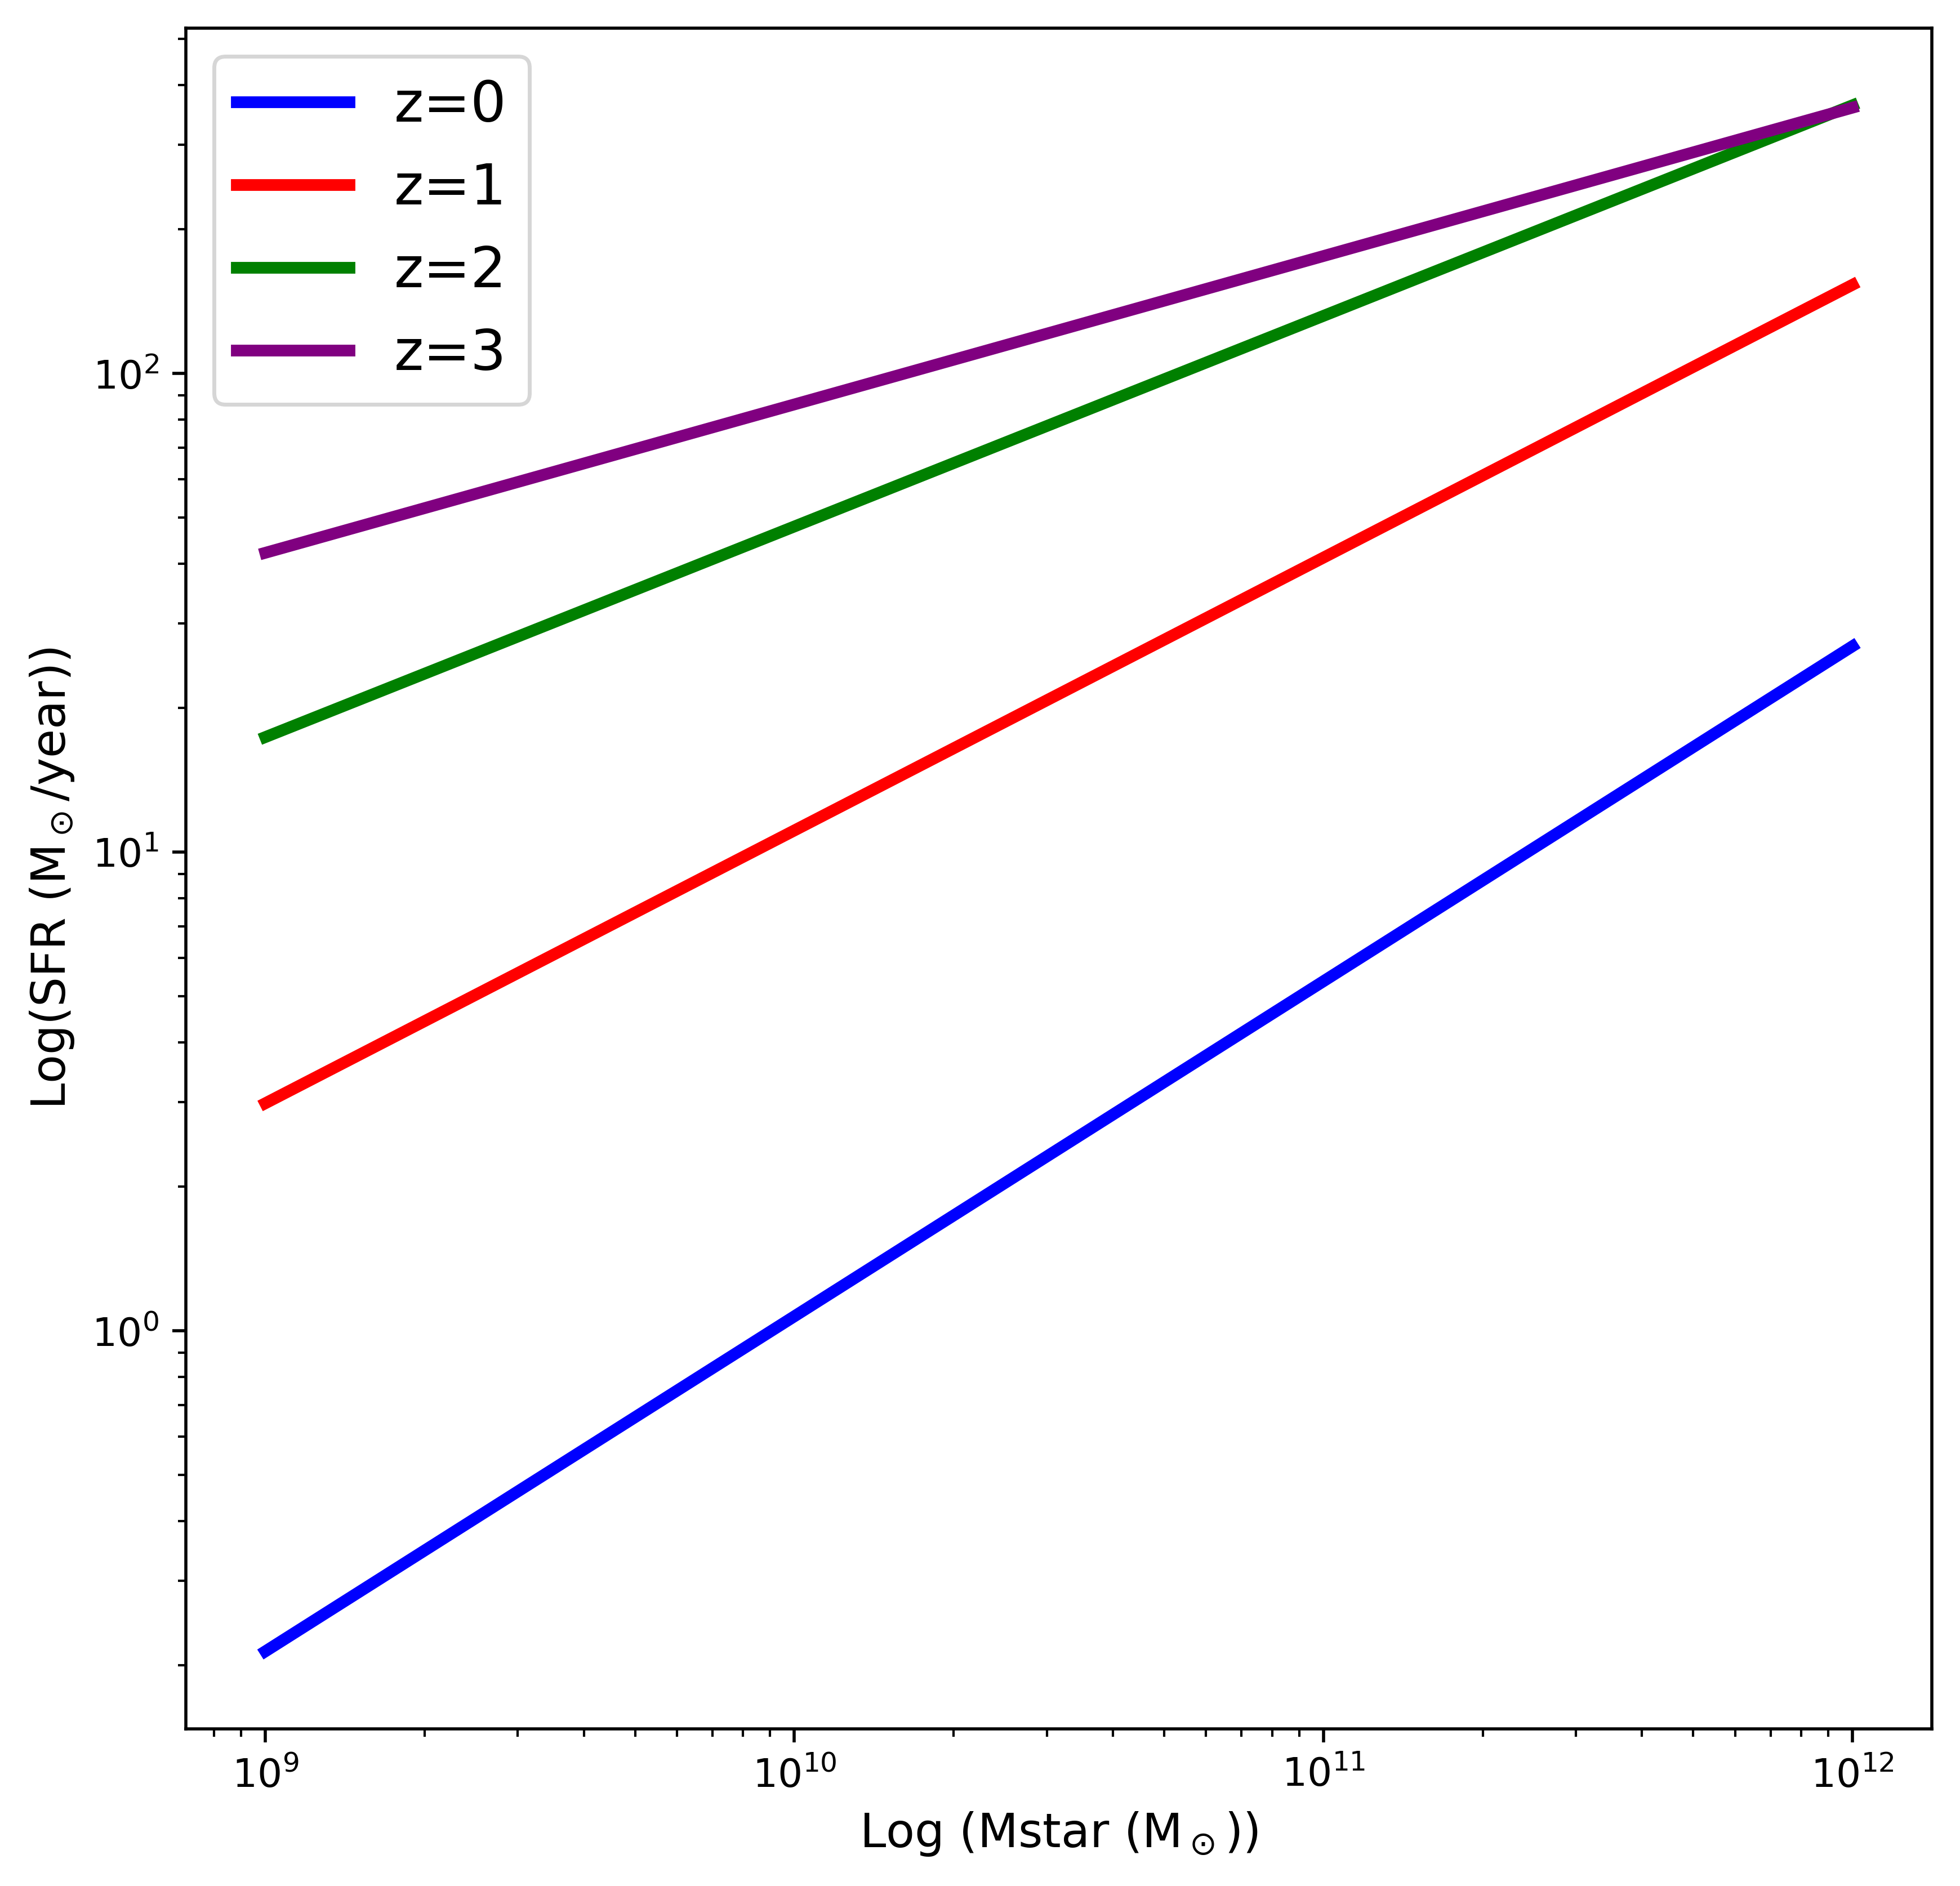

In [11]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMainSequence(Mass, 0 ), color ='Blue', linewidth = 3, label ='z=0')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 1 ), color ='Red', linewidth = 3, label ='z=1')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 2 ), color ='Green', linewidth = 3, label ='z=2')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 3 ), color ='Purple', linewidth = 3, label ='z=3')


# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

What are the star formation rates for :

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [14]:
# normal galaxies 
TIR_Normal = 1e10*LsunErgS
10**StarFormationRate(TIR_Normal, 'TIR')

1.4892648150381245

In [15]:
# LIRGs  
TIR_LIRG = 1e11*LsunErgS
10**StarFormationRate(TIR_LIRG, 'TIR')

14.892648150381245

In [16]:
# ULIRGs
TIR_ULIRG = 1e12*LsunErgS
10**StarFormationRate(TIR_ULIRG, 'TIR')

148.92648150381245

In [17]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS
10**StarFormationRate(TIR_HLIRG, 'TIR')

1489.2648150381244